### Install and import dependencies

In [9]:
# !pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install opencv-python

In [4]:
import cv2
import easyocr
from matplotlib import pyplot as plt
import numpy as np
import os

### Read in images or video

In [9]:
IMAGE_PATH = 'frame\\input_image.jpg'

In [3]:
reader = easyocr.Reader(["en"], gpu = True)
result = reader.readtext(IMAGE_PATH)
result[0]

([[19, 181], [165, 181], [165, 201], [19, 201]],
 'HEAD PROTECTION',
 0.9750311174073201)

### Draw results

In [4]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

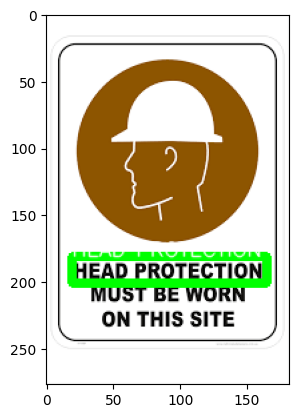

In [5]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 5)
img = cv2.putText(img, text, top_left, font, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
plt.imshow(img)
plt.show()

### Handling multiple lines

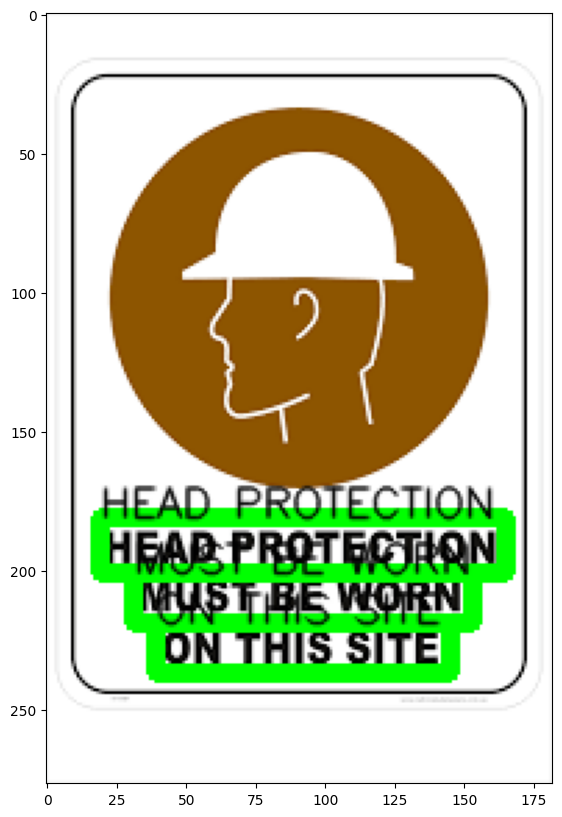

In [6]:
img = cv2.imread(IMAGE_PATH)
for detection in result:
    top_left = tuple([int(val) for val in detection[0][0]])
    bottom_right = tuple([int(val) for val in detection[0][2]])
    text = detection[1]
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 5)
    img = cv2.putText(img, text, top_left, font, 0.5, (0, 0, 0), 1, cv2.LINE_AA)

plt.figure(figsize = (10,10))
plt.imshow(img)
plt.show()

## VIDEO READING

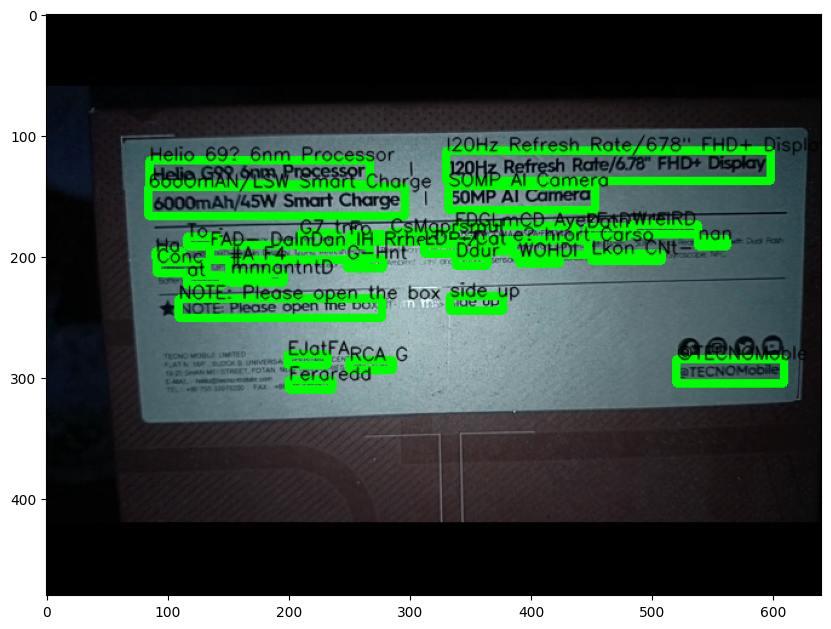

In [13]:
cap = cv2.VideoCapture(1)

if not cap.isOpened():
    print("Error: Could not open video device")
else:
    while True:
        ret, frame = cap.read()
        
        if not ret:
            print("Error: Failed to capture image")
            break
        
        cv2.imshow('Verification', frame)

        if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save input to folder
            image = cv2.imwrite(os.path.join('frame', 'input_image.jpg'), frame)

            IMAGE_PATH = 'frame\\input_image.jpg'

            reader = easyocr.Reader(["en"], gpu = True)
            result = reader.readtext(IMAGE_PATH)

            img = cv2.imread(IMAGE_PATH)
            for detection in result:
                top_left = tuple([int(val) for val in detection[0][0]])
                bottom_right = tuple([int(val) for val in detection[0][2]])
                text = detection[1]
                font = cv2.FONT_HERSHEY_SIMPLEX
                img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 5)
                img = cv2.putText(img, text, top_left, font, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            
            plt.figure(figsize = (10,10))
            plt.imshow(img)
            plt.show()

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()